In [1]:
import numpy as np
import pandas as pd
from pandas import *
from numpy import *
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import warnings 
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [2]:
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\bluebook-for-bulldozers\TrainAndValid.csv",
              parse_dates=["saledate"])

In [3]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
SalesID                     412698 non-null int64
SalePrice                   412698 non-null float64
MachineID                   412698 non-null int64
ModelID                     412698 non-null int64
datasource                  412698 non-null int64
auctioneerID                392562 non-null float64
YearMade                    412698 non-null int64
MachineHoursCurrentMeter    147504 non-null float64
UsageBand                   73670 non-null object
saledate                    412698 non-null datetime64[ns]
fiModelDesc                 412698 non-null object
fiBaseModel                 412698 non-null object
fiSecondaryDesc             271971 non-null object
fiModelSeries               58667 non-null object
fiModelDescriptor           74816 non-null object
ProductSize                 196093 non-null object
fiProductClassDesc          412698 non-null object
state              

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

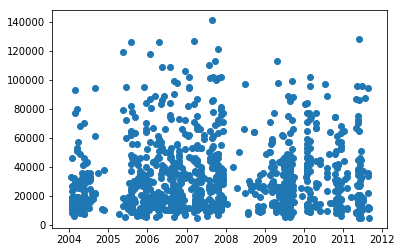

In [6]:
fig,ax=plt.subplots()
ax.scatter(list(df["saledate"][:1000]),list(df["SalePrice"][:1000]))

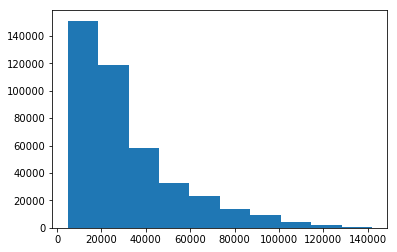

In [7]:
plt.hist(df["SalePrice"]);

In [8]:
df["saledate"].head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

In [9]:
df.sort_values(by=["saledate"],inplace =True,ascending=True)
df["saledate"].head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [10]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [11]:
df1=df.copy()

In [12]:
df1.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [13]:
df1["saleyear"]=df1.saledate.dt.year
df1["month"]=df1.saledate.dt.month
df1["date"]=df1.saledate.dt.day
df1["dayofweek"]=df1.saledate.dt.dayofweek
df1["dayofyear"]=df1.saledate.dt.dayofyear
df1.drop("saledate",axis=1,inplace=True)


In [14]:
df1.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,month,date,dayofweek,dayofyear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [15]:
df1

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,month,date,dayofweek,dayofyear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31
54653,1301884,23500.0,1182999,4123,132,99.0,1976,NaN,NaN,D6C,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
81383,1379228,31000.0,1082797,7620,132,99.0,1986,NaN,NaN,IT12,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
204924,1645390,11750.0,1527216,8202,132,99.0,1970,NaN,NaN,544,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
135376,1493279,63000.0,1363756,2759,132,99.0,1987,NaN,NaN,D5HII,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,1989,1,31,1,31
113390,1449549,13000.0,1289412,3356,132,99.0,1966,NaN,NaN,12F,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31


# Data preprocessing

In [16]:
for label, content in df1.items():
    if pd.api.types.is_string_dtype(content):
        df1[label]=content.astype("category").cat.codes
df1.info()       

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
SalesID                     412698 non-null int64
SalePrice                   412698 non-null float64
MachineID                   412698 non-null int64
ModelID                     412698 non-null int64
datasource                  412698 non-null int64
auctioneerID                392562 non-null float64
YearMade                    412698 non-null int64
MachineHoursCurrentMeter    147504 non-null float64
UsageBand                   412698 non-null int8
fiModelDesc                 412698 non-null int16
fiBaseModel                 412698 non-null int16
fiSecondaryDesc             412698 non-null int16
fiModelSeries               412698 non-null int16
fiModelDescriptor           412698 non-null int16
ProductSize                 412698 non-null int8
fiProductClassDesc          412698 non-null int8
state                       412698 non-null int8
ProductGroup                4126

In [17]:
for label, content in df1.items():
    if pd.api.types.is_string_dtype(content):
        print("yes")

In [18]:
for label, content in df1.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df1[label]=content.fillna(content.median(),inplace =True)
            
for label, content in df1.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df1[label]=pd.Categorical(content).codes+1           

In [19]:
df1.isnull().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper    

# Splitting data

In [20]:
df_val = df1[df1.saleyear == 2012]
df_train = df1[df1.saleyear != 2012]

In [21]:
x_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
x_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

# Modelling

In [22]:
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
pred=model.predict(x_valid)
pred

array([28650., 73500., 18250., ..., 17700., 68850., 35050.])

In [24]:
model.score(x_train,y_train)

0.981932513042509

In [25]:
def evaluate(y_true,y_pred):
    print("r-squared error:",r2_score(y_true,y_pred))
    print("mean_absolute_error",mean_absolute_error(y_true,y_pred))
    print("mean_squared_error",mean_squared_error(y_true,y_pred))

In [26]:
evaluate(y_valid,pred)

r-squared error: 0.8577656801971314
mean_absolute_error 6453.697096690573
mean_squared_error 97696830.59197357


# Tuning Hyperparameters 


In [27]:
from sklearn.model_selection import RandomizedSearchCV
prams = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}


In [28]:
rv=RandomizedSearchCV(RandomForestRegressor(),prams,n_iter=2,verbose=2,cv=5)
rv.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] max_features=1, min_samples_leaf=7, min_samples_split=4, n_estimators=40, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=1, min_samples_leaf=7, min_samples_split=4, n_estimators=40, max_depth=5, total=   3.3s
[CV] max_features=1, min_samples_leaf=7, min_samples_split=4, n_estimators=40, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV]  max_features=1, min_samples_leaf=7, min_samples_split=4, n_estimators=40, max_depth=5, total=   3.3s
[CV] max_features=1, min_samples_leaf=7, min_samples_split=4, n_estimators=40, max_depth=5 
[CV]  max_features=1, min_samples_leaf=7, min_samples_split=4, n_estimators=40, max_depth=5, total=   3.6s
[CV] max_features=1, min_samples_leaf=7, min_samples_split=4, n_estimators=40, max_depth=5 
[CV]  max_features=1, min_samples_leaf=7, min_samples_split=4, n_estimators=40, max_depth=5, total=   3.2s
[CV] max_features=1, min_samples_leaf=7, min_samples_split=4, n_estimators=40, max_depth=5 
[CV]  max_features=1, min_samples_leaf=7, min_samples_split=4, n_estimators=40, max_depth=5, total=   3.3s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=14, n_estimators=30, max_depth=10 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=14, n_estimators=30, max_depth=10, total= 1.3min
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=14, n_estimators=30, max_

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  7.9min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=2, n_jobs=None,
          param_distributions={'max_features': [0.5, 1, 'sqrt', 'auto'], 'max_depth': [None, 3, 5, 10], 'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]), 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]), 'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [29]:
rv.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 14,
 'n_estimators': 30}

In [30]:
rv_pred=rv.predict(x_valid)
rv_pred

array([36183.30996779, 84491.49159858, 17318.087744  , ...,
       15510.24024329, 67820.54538148, 24623.93452291])

In [31]:
evaluate(y_valid,rv_pred)

r-squared error: 0.8007986263860003
mean_absolute_error 7702.977534121093
mean_squared_error 136825928.3598223


In [32]:
df_test=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\bluebook-for-bulldozers\Test.csv",
              parse_dates=["saledate"])

In [33]:
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
5,1227870,1068694,16747,121,3,2007,3670.0,High,2012-05-03,WB146-5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1227871,1012262,9133,121,3,2005,6759.0,High,2012-05-03,WB140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1227879,1064696,4699,121,3,1000,0.0,NaN,2012-05-03,544E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
8,1227880,1067175,22145,121,3,1000,5528.0,Low,2012-05-03,650GIV,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
9,1227881,1007429,423,121,3,2000,10572.0,Medium,2012-05-03,PC228USLC2,...,None or Unspecified,"9' 8""",None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [34]:
df_test["saleyear"]=df_test.saledate.dt.year
df_test["month"]=df_test.saledate.dt.month
df_test["date"]=df_test.saledate.dt.day
df_test["dayofweek"]=df_test.saledate.dt.dayofweek
df_test["dayofyear"]=df_test.saledate.dt.dayofyear
df_test.drop("saledate",axis=1,inplace=True)

In [35]:
for label, content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df_test[label]=content.astype("category").cat.codes
df_test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 56 columns):
SalesID                     12457 non-null int64
MachineID                   12457 non-null int64
ModelID                     12457 non-null int64
datasource                  12457 non-null int64
auctioneerID                12457 non-null int64
YearMade                    12457 non-null int64
MachineHoursCurrentMeter    2129 non-null float64
UsageBand                   12457 non-null int8
fiModelDesc                 12457 non-null int16
fiBaseModel                 12457 non-null int16
fiSecondaryDesc             12457 non-null int8
fiModelSeries               12457 non-null int8
fiModelDescriptor           12457 non-null int8
ProductSize                 12457 non-null int8
fiProductClassDesc          12457 non-null int8
state                       12457 non-null int8
ProductGroup                12457 non-null int8
ProductGroupDesc            12457 non-null int8
Drive_System     

In [36]:
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_test[label]=content.fillna(content.median(),inplace =True)
            
for label, content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_test[label]=pd.Categorical(content).codes+1

In [37]:
pred=model.predict(df_test)

In [38]:
df_test["predicted_price"]=pred

In [39]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,month,date,dayofweek,dayofyear,predicted_price
0,1227829,1006309,3168,121,3,1999,0,1,498,179,...,-1,-1,-1,-1,2012,5,3,3,124,23250.0
1,1227844,1022817,7271,121,3,1000,0,0,830,291,...,-1,-1,2,1,2012,5,10,3,131,14135.0
2,1227847,1031560,22805,121,3,2004,0,2,1176,403,...,-1,-1,-1,-1,2012,5,10,3,131,49100.0
3,1227848,56204,1269,121,3,2006,0,0,286,112,...,-1,-1,-1,-1,2012,5,10,3,131,77700.0
4,1227863,1053887,22312,121,3,2005,0,1,565,195,...,3,4,-1,-1,2012,5,10,3,131,51930.0


In [40]:
df_pred=pd.DataFrame()
df_pred["salid"]=df_test["SalesID"]
df_pred["predicted_price"]=pred
df_pred

,salid,predicted_price
0,1227829,23250.0
1,1227844,14135.0
2,1227847,49100.0
3,1227848,77700.0
4,1227863,51930.0
5,1227870,31100.0
6,1227871,26400.0
7,1227879,11100.0
8,1227880,12925.0
9,1227881,52300.0
